# AutoEncoders for Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# enerate isotropic Gaussian blobs for clustering
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,       # 2 clusters
    cluster_std=1.0,random_state=101)

In [4]:
# data

In [5]:
X,y = data

In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [7]:
X.shape

(300, 2)

In [8]:
# third feature, just noise
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [9]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [10]:
feat = pd.DataFrame(X)
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [11]:
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [12]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


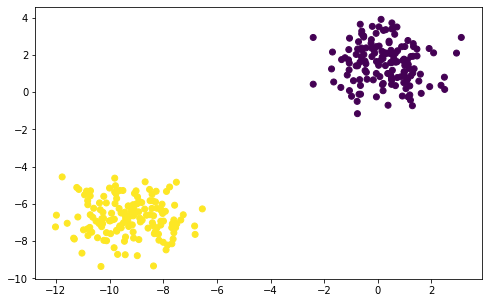

In [13]:
# 2 visible clusters
plt.figure(figsize=(8,5))
plt.scatter(feat['X1'],feat['X2'],c=y)
plt.show()

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# %matplotlib notebook

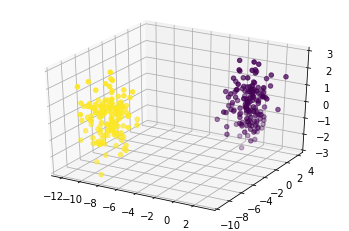

In [16]:
# third dimension, only noise
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

# Encoder and Decoder

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD  # stochastic gradient descent

In [18]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [19]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [20]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])  # list

In [22]:
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

## Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
# Note how all the data is used! There is no "right" answer here
# so we don't split the data
scaled_data = scaler.fit_transform(feat)

## Fit the model

In [26]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 3ms/step - loss: 0.2591
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1650
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1332
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1178
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.1107


In [27]:
# just the ENCODER: 3 ---> 2
encoded_2dim = encoder.predict(scaled_data)

In [28]:
encoded_2dim

array([[0.        , 0.09547722],
       [0.        , 1.3681123 ],
       [0.        , 1.3218791 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.0130606 ],
       [0.        , 0.        ],
       [0.        , 1.2116709 ],
       [0.        , 1.26109   ],
       [0.        , 0.06142426],
       [0.        , 0.        ],
       [0.        , 1.3644428 ],
       [0.        , 0.        ],
       [0.        , 1.0335736 ],
       [0.        , 0.00373131],
       [0.        , 1.201469  ],
       [0.        , 1.3070145 ],
       [0.        , 1.264226  ],
       [0.        , 1.0408018 ],
       [0.        , 0.        ],
       [0.        , 1.4158387 ],
       [0.        , 1.2433288 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 1.230134  ],
       [0.        , 1.2756572 ],
       [0.        , 1.0215211 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.

In [30]:
scaled_data.shape

(300, 3)

In [29]:
# 3 ---> 2
encoded_2dim.shape

(300, 2)

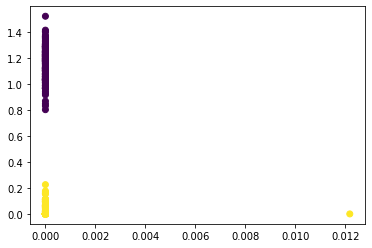

In [32]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)
plt.show()